In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs
import requests
import urllib.request
import re

# 장르 데이터

In [2]:
with open("genre_gn_all.json", "r",encoding="utf-8") as st_json:
     genreData = json.load(st_json)
genreData

{'GN0100': '발라드',
 'GN0101': '세부장르전체',
 'GN0102': "'80",
 'GN0103': "'90",
 'GN0104': "'00",
 'GN0105': "'10-",
 'GN0200': '댄스',
 'GN0201': '세부장르전체',
 'GN0202': "'80",
 'GN0203': "'90",
 'GN0204': "'00",
 'GN0205': "'10-",
 'GN0300': '랩/힙합',
 'GN0301': '세부장르전체',
 'GN0302': '랩 스타일',
 'GN0303': '보컬 스타일',
 'GN0304': '언더그라운드 힙합',
 'GN0305': '시대별',
 'GN0400': 'R&B/Soul',
 'GN0401': '세부장르전체',
 'GN0402': '어반',
 'GN0403': 'R&B',
 'GN0500': '인디음악',
 'GN0501': '세부장르전체',
 'GN0502': '포크',
 'GN0503': '록',
 'GN0504': '일렉',
 'GN0505': '힙합',
 'GN0506': '발라드',
 'GN0507': "'90",
 'GN0508': "'00",
 'GN0509': "'10-",
 'GN0600': '록/메탈',
 'GN0601': '세부장르전체',
 'GN0602': "'70",
 'GN0603': "'80",
 'GN0604': "'90",
 'GN0605': "'00",
 'GN0606': "'10-",
 'GN0700': '성인가요',
 'GN0701': '세부장르전체',
 'GN0702': '신세대트로트',
 'GN0703': '전설의트로트',
 'GN0704': '뽕짝트로트',
 'GN0705': '트로트메들리',
 'GN0706': "트로트'60-'70",
 'GN0707': "트로트'80-'90",
 'GN0708': "트로트'00-",
 'GN0709': "성인가요'80-'90",
 'GN0710': "성인가요'00-",
 'GN0800': '포크/블루스',

In [3]:
genreDF = pd.read_json('genre_gn_all.json', typ = 'series')

In [4]:
#장르코드: gnr_code, 장르명 : gnr_name
genreDF = pd.DataFrame(genreDF, columns = ['gnr_name']).reset_index().rename(columns = {'index' : 'gnr_code'})
genreDF

,gnr_code,gnr_name
0,GN0100,발라드
1,GN0101,세부장르전체
2,GN0102,'80
3,GN0103,'90
4,GN0104,'00
...,...,...
249,GN2900,뮤지컬
250,GN2901,세부장르전체
251,GN2902,국내뮤지컬
252,GN2903,국외뮤지컬


대분류 장르코드

In [5]:
# 대분류 장르 코드는 뒷자리 숫자 네자리 중 끝자리가 '00'인 코드로 분류
# 장르코드 뒷자리 두 자리가 00인 코드를 필터링
gnr_code = genreDF[genreDF['gnr_code'].str[-2:] == '00']
gnr_code

,gnr_code,gnr_name
0,GN0100,발라드
6,GN0200,댄스
12,GN0300,랩/힙합
18,GN0400,R&B/Soul
22,GN0500,인디음악
32,GN0600,록/메탈
39,GN0700,성인가요
50,GN0800,포크/블루스
56,GN0900,POP
65,GN1000,록/메탈


# 곡 별 메타데이터

In [6]:
with open("song_meta.json", "r",encoding="utf-8") as st_json:
     song_meta = json.load(st_json)
song_meta

[{'song_gn_dtl_gnr_basket': ['GN0901'],
  'issue_date': '20140512',
  'album_name': '불후의 명곡 - 7080 추억의 얄개시대 팝송베스트',
  'album_id': 2255639,
  'artist_id_basket': [2727],
  'song_name': 'Feelings',
  'song_gn_gnr_basket': ['GN0900'],
  'artist_name_basket': ['Various Artists'],
  'id': 0},
 {'song_gn_dtl_gnr_basket': ['GN1601', 'GN1606'],
  'issue_date': '20080421',
  'album_name': 'Bach : Partitas Nos. 2, 3 & 4',
  'album_id': 376431,
  'artist_id_basket': [29966],
  'song_name': 'Bach : Partita No. 4 In D Major, BWV 828 - II. Allemande',
  'song_gn_gnr_basket': ['GN1600'],
  'artist_name_basket': ['Murray Perahia'],
  'id': 1},
 {'song_gn_dtl_gnr_basket': ['GN0901'],
  'issue_date': '20180518',
  'album_name': 'Hit',
  'album_id': 4698747,
  'artist_id_basket': [3361],
  'song_name': 'Solsbury Hill (Remastered 2002)',
  'song_gn_gnr_basket': ['GN0900'],
  'artist_name_basket': ['Peter Gabriel'],
  'id': 2},
 {'song_gn_dtl_gnr_basket': ['GN1102', 'GN1101'],
  'issue_date': '20151016',
 

In [7]:
len(song_meta)

707989

In [8]:
song_meta = pd.read_json('song_meta.json', typ = 'frame')
song_meta

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4
...,...,...,...,...,...,...,...,...,...
707984,[GN2001],19991219,The Best Best Of The Black President,65254,[166499],Coffin For Head Of State,[GN2000],[Fela Kuti],707984
707985,[GN0901],19860000,True Colors,44141,[11837],Change Of Heart,[GN0900],[Cyndi Lauper],707985
707986,"[GN0105, GN0101]",20160120,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,2662866,[437],스치듯 안녕,[GN0100],[윤종신],707986
707987,"[GN1807, GN1801]",20131217,명상의 시간을 위한 뉴에이지 음악,2221722,[729868],숲의 빛,[GN1800],[Nature Piano],707987


년/월/일 컬럼 추가

In [9]:
str(song_meta["issue_date"][0])

'20140512'

In [10]:
str(song_meta["issue_date"][0])[0:4]

'2014'

In [11]:
str(song_meta["issue_date"][0])[4:6]

'05'

In [12]:
str(song_meta["issue_date"][0])[6:]

'12'

In [13]:
song_meta["year"] = song_meta["issue_date"].apply(lambda x: str(x)[:4])
song_meta["month"] = song_meta["issue_date"].apply(lambda x: str(x)[4:6])
song_meta["day"] = song_meta["issue_date"].apply(lambda x:str(x)[6:])
song_meta

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id,year,month,day
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0,2014,05,12
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1,2008,04,21
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2,2018,05,18
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3,2015,10,16
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4,2011,08,24
...,...,...,...,...,...,...,...,...,...,...,...,...
707984,[GN2001],19991219,The Best Best Of The Black President,65254,[166499],Coffin For Head Of State,[GN2000],[Fela Kuti],707984,1999,12,19
707985,[GN0901],19860000,True Colors,44141,[11837],Change Of Heart,[GN0900],[Cyndi Lauper],707985,1986,00,00
707986,"[GN0105, GN0101]",20160120,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,2662866,[437],스치듯 안녕,[GN0100],[윤종신],707986,2016,01,20
707987,"[GN1807, GN1801]",20131217,명상의 시간을 위한 뉴에이지 음악,2221722,[729868],숲의 빛,[GN1800],[Nature Piano],707987,2013,12,17


In [14]:
#곡별 id를 인덱스로 정하고, 날짜로 분류
song_meta = song_meta.sort_values(by="issue_date")


#원하는 순서대로 컬럼 변경 (곡명,아티스트명,아티스트id,장르,세부장르,발매날짜,년,월,일,앨범명,앨범id)
song_meta = song_meta[["song_name", "artist_name_basket", "artist_id_basket", "song_gn_gnr_basket", "song_gn_dtl_gnr_basket", "issue_date", "year", "month", "day","album_name", "album_id"]]
song_meta

,song_name,artist_name_basket,artist_id_basket,song_gn_gnr_basket,song_gn_dtl_gnr_basket,issue_date,year,month,day,album_name,album_id
247994,I`Ve Got You Under My Skin,[Frank Sinatra],[17131],[GN1700],"[GN1701, GN1702]",0,0,,,My Way : The Best Of Frank Sinatra,21832
285078,닐리리 맘보,[은방울 자매],[100050],[GN0700],[GN0701],0,0,,,은방울 자매 1집,312281
122928,You Are The Sunshine Of My Life,[Frank Sinatra],[17131],[GN1700],"[GN1701, GN1702]",0,0,,,Most Famous Hits Frank Sinatra,29477
227872,목련화,[박인수],[9199],[GN1600],"[GN1601, GN1615, GN1613, GN1610]",0,0,,,한국가곡 제1집,9525
479458,Roll Over Beethoven,[Chuck Berry],[2991],[GN1500],"[GN1503, GN1501]",0,0,,,척 베리 찬미하라! 찬미하라! 록큰롤 OST,21035
...,...,...,...,...,...,...,...,...,...,...,...
94317,Cigar,[핫펠트 (HA:TFELT)],[602471],[GN9000],[],20200423,2020,04,23,1719,10420622
526615,마음,[다린],[1956564],"[GN0500, GN0100]","[GN0509, GN0101, GN0105]",20200423,2020,04,23,마음,10421195
161737,기억이 잠든 사이에,[강승식 (VICTON)],[1229243],"[GN1500, GN0100]","[GN0105, GN1501, GN0101, GN1504]",20200423,2020,04,23,그 남자의 기억법 OST Part.5,10421858
141185,잔잔한 바람이 불어와 (There is a gentle breeze),[무드홀릭 (Moodholic)],[2737142],[GN1800],[GN1801],20220113,2022,01,13,고요한 밤바다 구경하기 [여수 바다],10403230


In [16]:
song_1990=song_meta[song_meta["year"]>="1990"]

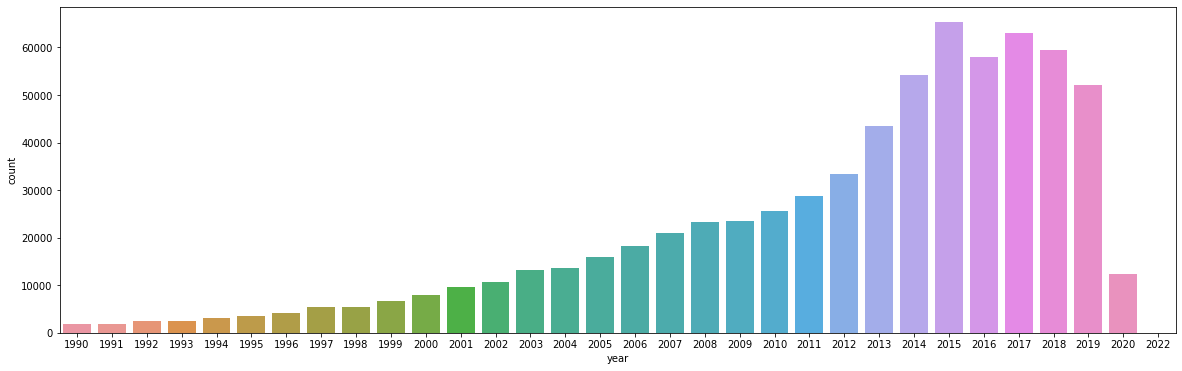

In [17]:
# matplotlib를 활용한 그릴 준비..
fig, axes = plt.subplots(figsize=(20, 6))

# 그릴 그래프는 seaborn
sns.countplot(x='year', data=song_1990)

In [18]:
song_month = song_meta.sort_values(by="month",ascending=True)

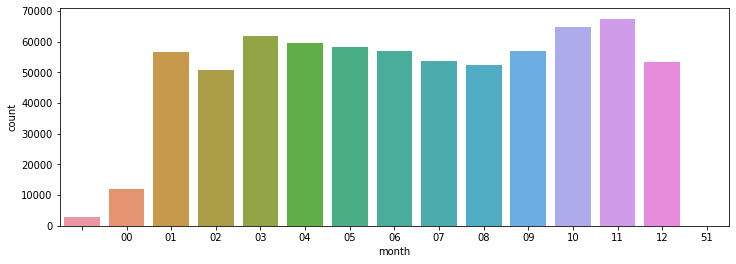

In [19]:
#월별 발매곡 수
fig, axes = plt.subplots(figsize=(12, 4))

sns.countplot(x='month', data=song_month)

# 벅스음악차트

In [20]:
date="20190101"
url_part1="http://music.bugs.co.kr/chart/track/week/total?chartdate="
url=url_part1+date
print(url)

http://music.bugs.co.kr/chart/track/week/total?chartdate=20190101


In [21]:
res = requests.get(url)
soup=bs(res.text, 'html.parser')

In [22]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <!-- bgsweb-www909 -->
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="음악,음악 스트리밍,최신음악,인기가요,뮤직비디오,앨범,플레이어,mp3 다운로드,놀면뭐하니,유플래쉬,유플래시" name="keywords">
   <script type="text/javascript">
    if(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/newRadio") >= 0 || location.href.indexOf("localhost") >= 0))
		document.domain = 'bugs.co.kr';

	var g_urlBase = "https://www.bugs.co.kr";
	var g_urlWww = "https://www.bugs.co.kr";
	var g_urlSecure = "https://secure.bugs.co.kr";
	var g_urlMusic = "https://music.bugs.co.kr";
	var g_urlMusicSecure = "https://music.bugs.co.kr";
	var g_urlMember = "https://secure.bugs.co.kr/member";
	var g_urlFile = "https://file.bugsm.co.kr/wbugs";
	var g_urlFile_n ="https://file.bugsm.co.kr/nbugs"; 
	//var g_urlSwf = "https://music.bugs.co.kr/swf";
	var g_urlSwf = "https://music.bugs.co.kr/swf";
	var g_urlJs = "/js";
	var g

In [23]:
chartData = pd.DataFrame()
chartData = chartData.append(
    {"ranking":"", "song":"", "artist":"", "album":"" }, ignore_index=True)
chartData

,album,artist,ranking,song
0,,,,


In [24]:
soup.find_all("tr")

[<tr>
 <th class="check" scope="col"></th>
 <th class="ranking" scope="col"><span>순위</span></th>
 <th class="albumArt" scope="col"></th>
 <th class="trackInfo" scope="col"></th>
 <th class="title" scope="col"><span>곡</span></th>
 <th class="artist" scope="col"><span>아티스트</span></th>
 <th class="album" scope="col"><span>앨범</span></th>
 <th class="action play" scope="col"><span>듣기</span></th>
 <th class="action add01" scope="col"><span>재생목록</span></th>
 <th class="action add02" scope="col"><span>내앨범</span></th>
 <th class="action download" scope="col"><span>다운</span></th>
 <th class="action mv" scope="col"><span>영상</span></th>
 <th class="action etc" scope="col"><span>기타</span></th>
 </tr>,
 <tr albumid="20219783" artistid="80259080" multiartist="N" mvid="471551" rowtype="track" trackid="31396090">
 <input name="_isStream" type="hidden" value="31396090">
 <input name="_isDown" type="hidden" value="31396090">
 <td class="check"><input buyminquality="T" disc_id="1" name="check" title="벌써 1

In [25]:
len(soup.find_all("tr"))

104

In [26]:
#1위 정보
soup.find_all("tr")[1]

<tr albumid="20219783" artistid="80259080" multiartist="N" mvid="471551" rowtype="track" trackid="31396090">
<input name="_isStream" type="hidden" value="31396090">
<input name="_isDown" type="hidden" value="31396090">
<td class="check"><input buyminquality="T" disc_id="1" name="check" title="벌써 12시" type="checkbox" value="31396090"/></td>
<td>
<div class="ranking">
<strong>1</strong>
<p class="change hot"><em>HOT</em></p>
</div>
</td>
<td>
<a class="thumbnail" href="https://music.bugs.co.kr/album/20219783?wl_ref=list_tr_07_chart" onclick="
">
<span class="mask"></span>
<img alt="벌써 12시 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/202197/20219783.jpg?version=20190910050157.0"/>
</a>
</td>
<td>
<a class="trackInfo" href="https://music.bugs.co.kr/track/31396090?wl_ref=list_tr_08_chart" onclick="
">곡정보</a>
</td>
<th scope="row">
<p adult_yn="N" class="title">
<a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('

In [27]:
#100위 정보
soup.find_all("tr")[100]

<tr albumid="20144113" artistid="80246729" multiartist="N" mvid="381150" rowtype="track" trackid="30930536">
<input name="_isStream" type="hidden" value="30930536">
<input name="_isDown" type="hidden" value="30930536"/>
<td class="check"><input buyminquality="T" disc_id="1" name="check" title="사랑을 했다 (LOVE SCENARIO)" type="checkbox" value="30930536"/></td>
<td>
<div class="ranking">
<strong>100</strong>
<p class="change up"><span class="arrow"></span> <em>8</em> <span>계단 상승</span></p>
</div>
</td>
<td>
<a class="thumbnail" href="https://music.bugs.co.kr/album/20144113?wl_ref=list_tr_07_chart" onclick="
">
<span class="mask"></span>
<img alt="Return 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/201441/20144113.jpg?version=20190821040521.0"/>
</a>
</td>
<td>
<a class="trackInfo" href="https://music.bugs.co.kr/track/30930536?wl_ref=list_tr_08_chart" onclick="
">곡정보</a>
</td>
<th scope="row">
<p adult_yn="N" class="title">
<a adultcheckval="1" a

In [28]:
#1위 ranking
soup.find_all("tr")[1].find("strong").text

'1'

In [29]:
#1위 곡명
soup.find_all("tr")[1].find("th").text.strip()

'벌써 12시'

In [30]:
#1위 아티스트명
soup.find_all("tr")[1].find_all("a")[3].text

'청하'

In [31]:
#1위 앨범명
soup.find_all("tr")[1].find_all("td")[5].text.strip()

'벌써 12시'

In [32]:
#날짜
date = soup.find("time").text.strip()
date 

'2018.12.31 ~ 2019.01.06\r\n\t\t\t\t\t\t\t\t\t\t\t\t\n캘린더 레이어 띄움'

In [33]:
#date
date = date.replace("\r", "")
date = date.replace("\n", "")
date = date.replace("\t", "")
date = date.replace("캘린더 레이어 띄움", "")
date

'2018.12.31 ~ 2019.01.06'

In [34]:
chartDF = pd.DataFrame()
chartDF_temp = pd.DataFrame()
chartDF_temp = chartDF_temp.append({
    "ranking":"", 
    "song":"", 
    "artist":"", 
    "album":"" ,
    "date" : ""},
    ignore_index=True)

temp_ranking_idx = chartDF_temp.columns.get_loc("ranking")
temp_song_idx = chartDF_temp.columns.get_loc("song")
temp_artist_idx = chartDF_temp.columns.get_loc("artist")
temp_album_idx = chartDF_temp.columns.get_loc("album")
temp_date_idx = chartDF_temp.columns.get_loc("date")

for i in range(1, 101):
    chartDF_temp.iat[0, temp_ranking_idx] = soup.find_all("tr")[i].find("strong").text
    chartDF_temp.iat[0, temp_song_idx] = soup.find_all("tr")[i].find("th").text.strip()
    chartDF_temp.iat[0, temp_artist_idx] = soup.find_all("tr")[i].find_all("a")[3].text
    chartDF_temp.iat[0, temp_album_idx] = soup.find_all("tr")[i].find_all("td")[5].text.strip()
    date = soup.find("time").text.strip()
    date = date.replace("\r", "")
    date = date.replace("\n", "")
    date = date.replace("\t", "")
    date = date.replace("캘린더 레이어 띄움", "")
    chartDF_temp.iat[0, temp_date_idx] = date
    
    chartDF = chartDF.append(chartDF_temp, ignore_index=True)

    for j in range(0, len(chartDF_temp.columns)):
        chartDF_temp.iat[0,j] = ""
chartDF
    

,album,artist,date,ranking,song
0,벌써 12시,청하,2018.12.31 ~ 2019.01.06,1,벌써 12시
1,안녕,숀(SHAUN),2018.12.31 ~ 2019.01.06,2,습관 (Bad Habits)
2,Circular,엠씨더맥스 (M.C the MAX),2018.12.31 ~ 2019.01.06,3,넘쳐흘러
3,MILLIONS,WINNER,2018.12.31 ~ 2019.01.06,4,MILLIONS
4,SOLO,제니 (JENNIE),2018.12.31 ~ 2019.01.06,5,SOLO
...,...,...,...,...,...
95,1¹¹=1 (POWER OF DESTINY),Wanna One(워너원),2018.12.31 ~ 2019.01.06,96,봄바람
96,Voicenotes,Charlie Puth(찰리 푸스),2018.12.31 ~ 2019.01.06,97,Done For Me
97,Circular,엠씨더맥스 (M.C the MAX),2018.12.31 ~ 2019.01.06,98,물그림
98,Lovelyz 5th Mini Album [SANCTUARY],러블리즈(Lovelyz),2018.12.31 ~ 2019.01.06,99,찾아가세요


In [35]:
chartDF = pd.DataFrame()
chartDF_temp = pd.DataFrame()
chartDF_temp = chartDF_temp.append({
    "ranking":"", 
    "song":"", 
    "artist":"", 
    "album":"" ,
    "date" :""},
    ignore_index=True)

temp_ranking_idx = chartDF_temp.columns.get_loc("ranking")
temp_song_idx = chartDF_temp.columns.get_loc("song")
temp_artist_idx = chartDF_temp.columns.get_loc("artist")
temp_album_idx = chartDF_temp.columns.get_loc("album")
temp_date_idx = chartDF_temp.columns.get_loc("date")

start_dates = ["20190101", "20190108", "20190115", "20190122"]
for k in range (0, len(start_dates)):
    start_dates[k]
    url_part1="http://music.bugs.co.kr/chart/track/week/total?chartdate="
    url=url_part1+start_dates[k]
    res = requests.get(url)
    soup = bs(res.text,"html.parser")

    for i in range(1, 101):
        chartDF_temp.iat[0, temp_ranking_idx] = soup.find_all("tr")[i].find("strong").text
        chartDF_temp.iat[0, temp_song_idx] = soup.find_all("tr")[i].find("th").text.strip()
        chartDF_temp.iat[0, temp_artist_idx] = soup.find_all("tr")[i].find_all("a")[3].text
        chartDF_temp.iat[0, temp_album_idx] = soup.find_all("tr")[i].find_all("td")[5].text.strip()
        date = soup.find("time").text.strip()
        date = date.replace("\r", "")
        date = date.replace("\n", "")
        date = date.replace("\t", "")
        date = date.replace("캘린더 레이어 띄움", "")
        chartDF_temp.iat[0, temp_date_idx] = date

        chartDF = chartDF.append(chartDF_temp, ignore_index=True)

        for j in range(0, len(chartDF_temp.columns)):
            chartDF_temp.iat[0,j] = ""
chartDF
    

,album,artist,date,ranking,song
0,벌써 12시,청하,2018.12.31 ~ 2019.01.06,1,벌써 12시
1,안녕,숀(SHAUN),2018.12.31 ~ 2019.01.06,2,습관 (Bad Habits)
2,Circular,엠씨더맥스 (M.C the MAX),2018.12.31 ~ 2019.01.06,3,넘쳐흘러
3,MILLIONS,WINNER,2018.12.31 ~ 2019.01.06,4,MILLIONS
4,SOLO,제니 (JENNIE),2018.12.31 ~ 2019.01.06,5,SOLO
...,...,...,...,...,...
395,보헤미안 랩소디 (Bohemian Rhapsody) OST,Queen(퀸),2019.01.21 ~ 2019.01.27,96,Somebody To Love (2011 Mix)
396,헤어지는 중,펀치 (Punch),2019.01.21 ~ 2019.01.27,97,헤어지는 중
397,IM,저스디스(JUSTHIS),2019.01.21 ~ 2019.01.27,98,[19금]\nIndiGO
398,사랑하지 말아요 (Prod. 로코베리),이석훈,2019.01.21 ~ 2019.01.27,99,사랑하지 말아요 (Prod. 로코베리)


In [36]:
import datetime as dt
import pandas as pd

In [37]:
daily_daterange = pd.date_range(start=dt.datetime(2019, 1, 1), end=dt.datetime(2019,12,31), freq='B')
daily_dataset = pd.DataFrame({'value' : range(len(daily_daterange))}, index=daily_daterange)
chartdate = daily_dataset.resample('W-MON').sum().index
chartdate 

DatetimeIndex(['2019-01-07', '2019-01-14', '2019-01-21', '2019-01-28',
               '2019-02-04', '2019-02-11', '2019-02-18', '2019-02-25',
               '2019-03-04', '2019-03-11', '2019-03-18', '2019-03-25',
               '2019-04-01', '2019-04-08', '2019-04-15', '2019-04-22',
               '2019-04-29', '2019-05-06', '2019-05-13', '2019-05-20',
               '2019-05-27', '2019-06-03', '2019-06-10', '2019-06-17',
               '2019-06-24', '2019-07-01', '2019-07-08', '2019-07-15',
               '2019-07-22', '2019-07-29', '2019-08-05', '2019-08-12',
               '2019-08-19', '2019-08-26', '2019-09-02', '2019-09-09',
               '2019-09-16', '2019-09-23', '2019-09-30', '2019-10-07',
               '2019-10-14', '2019-10-21', '2019-10-28', '2019-11-04',
               '2019-11-11', '2019-11-18', '2019-11-25', '2019-12-02',
               '2019-12-09', '2019-12-16', '2019-12-23', '2019-12-30',
               '2020-01-06'],
              dtype='datetime64[ns]', freq='W-M

In [38]:
str(chartdate[0]).split()[0]

'2019-01-07'

In [39]:
chartDF = pd.DataFrame()
chartDF_temp = pd.DataFrame()
chartDF_temp = chartDF_temp.append({
    "ranking":"", 
    "song":"", 
    "artist":"", 
    "album":"" ,
    "date" :""},
    ignore_index=True)

temp_ranking_idx = chartDF_temp.columns.get_loc("ranking")
temp_song_idx = chartDF_temp.columns.get_loc("song")
temp_artist_idx = chartDF_temp.columns.get_loc("artist")
temp_album_idx = chartDF_temp.columns.get_loc("album")
temp_date_idx = chartDF_temp.columns.get_loc("date")

for k in chartdate:
    date_str = str(k).split()[0]
    url_part1="http://music.bugs.co.kr/chart/track/week/total?chartdate="
    url=url_part1+date_str
    res = requests.get(url)
    soup = bs(res.text,"html.parser")
    print(url)
    
    for i in range(1, 101):
        chartDF_temp.iat[0, temp_ranking_idx] = soup.find_all("tr")[i].find_all("td")[1].find("strong").text
        chartDF_temp.iat[0, temp_song_idx] = soup.find_all("tr")[i].find_all("td")[0].find("input").get("title")
        chartDF_temp.iat[0, temp_artist_idx] = soup.find_all("tr")[i].find_all("td")[4].find("a").text
        chartDF_temp.iat[0, temp_album_idx] = soup.find_all("tr")[i].find_all("td")[5].text.strip()
        date = soup.find("time").text.strip()
        date = date.replace("\r", "")
        date = date.replace("\n", "")
        date = date.replace("\t", "")
        date = date.replace("캘린더 레이어 띄움", "")
        chartDF_temp.iat[0, temp_date_idx] = date

        chartDF = chartDF.append(chartDF_temp, ignore_index=True)

        for j in range(0, len(chartDF_temp.columns)):
            chartDF_temp.iat[0,j] = ""
chartDF    

http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-01-07
http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-01-14
http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-01-21
http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-01-28
http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-02-04
http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-02-11
http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-02-18
http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-02-25
http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-03-04
http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-03-11
http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-03-18
http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-03-25
http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-04-01
http://music.bugs.co.kr/chart/track/week/total?chartdate=2019-04-08
http://music.bugs.co.kr/chart/track/week/total?c

,album,artist,date,ranking,song
0,벌써 12시,청하,2019.01.07 ~ 2019.01.13,1,벌써 12시
1,Circular,엠씨더맥스 (M.C the MAX),2019.01.07 ~ 2019.01.13,2,넘쳐흘러
2,PERCENT,Apink (에이핑크),2019.01.07 ~ 2019.01.13,3,%%(응응)
3,THEN & NOW,지오디(god),2019.01.07 ~ 2019.01.13,4,"길 (Song by 아이유, 헨리, 조현아, 양다일)"
4,안녕,숀(SHAUN),2019.01.07 ~ 2019.01.13,5,습관 (Bad Habits)
...,...,...,...,...,...
5295,Frozen 2 (겨울왕국 2 OST),Evan Rachel Wood(이반 레이첼 우드),2020.01.06 ~ 2020.01.12,96,All Is Found
5296,Frozen 2 (겨울왕국 2 OST),Panic! At The Disco(패닉 앳 더 디스코),2020.01.06 ~ 2020.01.12,97,Into the Unknown (Panic! At The Disco Version)
5297,5월의 밤,Zion.T,2020.01.06 ~ 2020.01.12,98,5월의 밤
5298,사랑의 불시착 OST Part 1,10CM,2020.01.06 ~ 2020.01.12,99,우연인 듯 운명


In [40]:
song_meta = song_meta[["song_name", "song_gn_gnr_basket"]]
song_meta

,song_name,song_gn_gnr_basket
247994,I`Ve Got You Under My Skin,[GN1700]
285078,닐리리 맘보,[GN0700]
122928,You Are The Sunshine Of My Life,[GN1700]
227872,목련화,[GN1600]
479458,Roll Over Beethoven,[GN1500]
...,...,...
94317,Cigar,[GN9000]
526615,마음,"[GN0500, GN0100]"
161737,기억이 잠든 사이에,"[GN1500, GN0100]"
141185,잔잔한 바람이 불어와 (There is a gentle breeze),[GN1800]


In [41]:
gnr_code = genreDF[genreDF['gnr_code'].str[-2:] == '00']
gnr_code

,gnr_code,gnr_name
0,GN0100,발라드
6,GN0200,댄스
12,GN0300,랩/힙합
18,GN0400,R&B/Soul
22,GN0500,인디음악
32,GN0600,록/메탈
39,GN0700,성인가요
50,GN0800,포크/블루스
56,GN0900,POP
65,GN1000,록/메탈


In [42]:
#100내에 있는 곡 장르 매칭
chart_gnr = pd.merge(chartDF, song_meta, how="left", left_on = "song", right_on="song_name")
chart_gnr

,album,artist,date,ranking,song,song_name,song_gn_gnr_basket
0,벌써 12시,청하,2019.01.07 ~ 2019.01.13,1,벌써 12시,벌써 12시,"[GN2500, GN0200]"
1,Circular,엠씨더맥스 (M.C the MAX),2019.01.07 ~ 2019.01.13,2,넘쳐흘러,넘쳐흘러,[GN0100]
2,PERCENT,Apink (에이핑크),2019.01.07 ~ 2019.01.13,3,%%(응응),%%(응응),"[GN2500, GN0200]"
3,THEN & NOW,지오디(god),2019.01.07 ~ 2019.01.13,4,"길 (Song by 아이유, 헨리, 조현아, 양다일)","길 (Song by 아이유, 헨리, 조현아, 양다일)","[GN2500, GN0100]"
4,안녕,숀(SHAUN),2019.01.07 ~ 2019.01.13,5,습관 (Bad Habits),습관 (Bad Habits),"[GN0500, GN2600]"
...,...,...,...,...,...,...,...
44016,Frozen 2 (겨울왕국 2 OST),Panic! At The Disco(패닉 앳 더 디스코),2020.01.06 ~ 2020.01.12,97,Into the Unknown (Panic! At The Disco Version),NaN,NaN
44017,5월의 밤,Zion.T,2020.01.06 ~ 2020.01.12,98,5월의 밤,5월의 밤,[GN0100]
44018,사랑의 불시착 OST Part 1,10CM,2020.01.06 ~ 2020.01.12,99,우연인 듯 운명,우연인 듯 운명,"[GN1500, GN0100]"
44019,사랑의 불시착 OST Part 1,10CM,2020.01.06 ~ 2020.01.12,99,우연인 듯 운명,우연인 듯 운명,"[GN1500, GN0100]"


In [43]:
temp = pd.DataFrame(chart_gnr["song_gn_gnr_basket"].apply(pd.Series).stack().reset_index(drop=True))
temp = temp.rename(columns={0:"code"})
temp

,code
0,GN2500
1,GN0200
2,GN0100
3,GN2500
4,GN0200
...,...
54723,GN1500
54724,GN0100
54725,GN1500
54726,GN0100


In [44]:
temp2 = pd.merge(temp,gnr_code, how="left", left_on="code", right_on="gnr_code" )
temp2

,code,gnr_code,gnr_name
0,GN2500,GN2500,아이돌
1,GN0200,GN0200,댄스
2,GN0100,GN0100,발라드
3,GN2500,GN2500,아이돌
4,GN0200,GN0200,댄스
...,...,...,...
54723,GN1500,GN1500,OST
54724,GN0100,GN0100,발라드
54725,GN1500,GN1500,OST
54726,GN0100,GN0100,발라드


In [45]:
from matplotlib import font_manager #한글을 사용하기 위해 matplotlib패키지 중에서 font_manager패키지를 가져오는 작업

#밑에 그림 참조(윈도우 기준 폰트 저장 장소)
# 여기에 있는 H2GPRM.TTF는 변경 가능함!!! 단, 한글이 되는 폰트로 찾아서 해야함!!!!!
font_fname = 'C:\\Windows\\Fonts\\H2GPRM.TTF' 
font_family = font_manager.FontProperties(fname=font_fname).get_name() #자신이 지정한 폰트를 주피터 노트북에 적용하는 코드

plt.rcParams["font.family"] = font_family

print(font_family)#마지막으로 자신이 정한 코드가 작동되엇는지 확인하기 위해 프린트를 찍어봄

HYGraphic-Medium


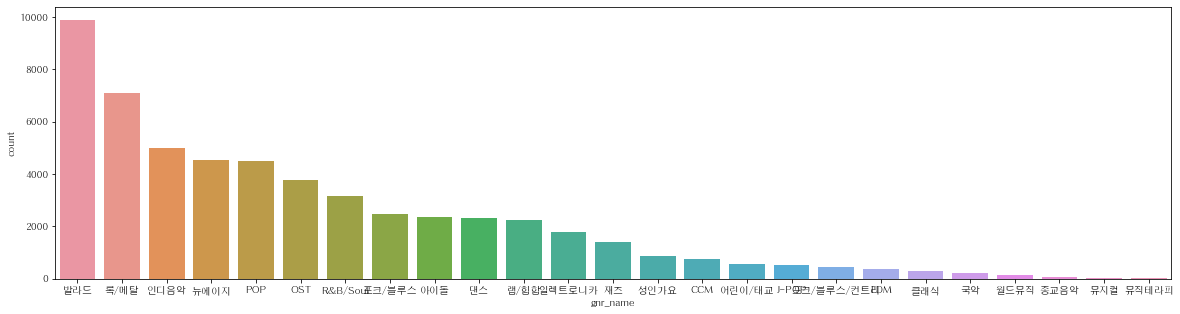

In [46]:
#100위 내 수록곡에서 제일 많이 차지하는 장르
plt.figure(figsize=(20,5))
sns.countplot(data= temp2, x= "gnr_name", order= temp2["gnr_name"].value_counts().index)

In [47]:
song_meta.head()

,song_name,song_gn_gnr_basket
247994,I`Ve Got You Under My Skin,[GN1700]
285078,닐리리 맘보,[GN0700]
122928,You Are The Sunshine Of My Life,[GN1700]
227872,목련화,[GN1600]
479458,Roll Over Beethoven,[GN1500]


In [48]:
#2019년 1위 곡 리스트
chart1 = chartDF[chartDF["ranking"]=="1"] 
chart1

,album,artist,date,ranking,song
0,벌써 12시,청하,2019.01.07 ~ 2019.01.13,1,벌써 12시
100,여자친구 The 2nd Album 'Time for us',여자친구(GFRIEND),2019.01.14 ~ 2019.01.20,1,해야 (Sunrise)
200,신청곡 (Feat. SUGA of BTS),이소라,2019.01.21 ~ 2019.01.27,1,신청곡 (Feat. SUGA of BTS)
300,이 노래가 클럽에서 나온다면,우디(Woody),2019.01.28 ~ 2019.02.03,1,이 노래가 클럽에서 나온다면
400,이 노래가 클럽에서 나온다면,우디(Woody),2019.02.04 ~ 2019.02.10,1,이 노래가 클럽에서 나온다면
500,IT'z Different,ITZY (있지),2019.02.11 ~ 2019.02.17,1,달라달라
600,FLY HIGH PROJECT #2 '옥탑방',엔플라잉(N.Flying),2019.02.18 ~ 2019.02.24,1,옥탑방 (Rooftop)
700,FLY HIGH PROJECT #2 '옥탑방',엔플라잉(N.Flying),2019.02.25 ~ 2019.03.03,1,옥탑방 (Rooftop)
800,FLY HIGH PROJECT #2 '옥탑방',엔플라잉(N.Flying),2019.03.04 ~ 2019.03.10,1,옥탑방 (Rooftop)
900,sleepless in __________,에픽하이 (EPIK HIGH),2019.03.11 ~ 2019.03.17,1,술이 달다 (Feat. Crush)


In [49]:
#1위곡 장르 매칭
chart1_gnr = pd.merge(chart1, song_meta, how="left", left_on = "song", right_on="song_name")
chart1_gnr

,album,artist,date,ranking,song,song_name,song_gn_gnr_basket
0,벌써 12시,청하,2019.01.07 ~ 2019.01.13,1,벌써 12시,벌써 12시,"[GN2500, GN0200]"
1,여자친구 The 2nd Album 'Time for us',여자친구(GFRIEND),2019.01.14 ~ 2019.01.20,1,해야 (Sunrise),해야 (Sunrise),"[GN2500, GN0200]"
2,신청곡 (Feat. SUGA of BTS),이소라,2019.01.21 ~ 2019.01.27,1,신청곡 (Feat. SUGA of BTS),신청곡 (Feat. SUGA of BTS),[GN0100]
3,이 노래가 클럽에서 나온다면,우디(Woody),2019.01.28 ~ 2019.02.03,1,이 노래가 클럽에서 나온다면,이 노래가 클럽에서 나온다면,"[GN0500, GN0300]"
4,이 노래가 클럽에서 나온다면,우디(Woody),2019.02.04 ~ 2019.02.10,1,이 노래가 클럽에서 나온다면,이 노래가 클럽에서 나온다면,"[GN0500, GN0300]"
...,...,...,...,...,...,...,...
467,‘The ReVe Festival’ Finale,Red Velvet (레드벨벳),2020.01.06 ~ 2020.01.12,1,Psycho,Psycho,"[GN0400, GN2500]"
468,‘The ReVe Festival’ Finale,Red Velvet (레드벨벳),2020.01.06 ~ 2020.01.12,1,Psycho,Psycho,[GN1200]
469,‘The ReVe Festival’ Finale,Red Velvet (레드벨벳),2020.01.06 ~ 2020.01.12,1,Psycho,Psycho,[GN0900]
470,‘The ReVe Festival’ Finale,Red Velvet (레드벨벳),2020.01.06 ~ 2020.01.12,1,Psycho,Psycho,"[GN2500, GN0200]"


In [50]:
gnr_code = genreDF[genreDF['gnr_code'].str[-2:] == '00']
gnr_code

,gnr_code,gnr_name
0,GN0100,발라드
6,GN0200,댄스
12,GN0300,랩/힙합
18,GN0400,R&B/Soul
22,GN0500,인디음악
32,GN0600,록/메탈
39,GN0700,성인가요
50,GN0800,포크/블루스
56,GN0900,POP
65,GN1000,록/메탈


In [51]:
max(chart1_gnr["song_gn_gnr_basket"].apply(lambda x : len(str(x).split(","))))

3

In [55]:
temp1 = pd.DataFrame(chart1_gnr["song_gn_gnr_basket"].apply(pd.Series).stack().reset_index(drop=True))
temp1 = temp1.rename(columns={0:"code"})
temp1

,code
0,GN2500
1,GN0200
2,GN2500
3,GN0200
4,GN0100
...,...
598,GN1200
599,GN0900
600,GN2500
601,GN0200


In [56]:
temp3 = pd.merge(temp1,gnr_code, how="left", left_on="code", right_on="gnr_code" )
temp3

,code,gnr_code,gnr_name
0,GN2500,GN2500,아이돌
1,GN0200,GN0200,댄스
2,GN2500,GN2500,아이돌
3,GN0200,GN0200,댄스
4,GN0100,GN0100,발라드
...,...,...,...
598,GN1200,GN1200,랩/힙합
599,GN0900,GN0900,POP
600,GN2500,GN2500,아이돌
601,GN0200,GN0200,댄스


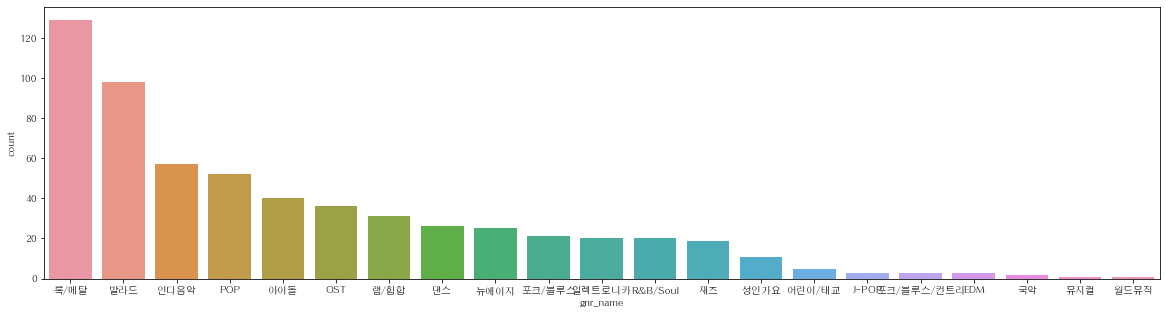

In [57]:
#1위 곡에서 제일 많이 차지하는 장르
plt.figure(figsize=(20,5))
sns.countplot(data= temp3, x= "gnr_name", order= temp3["gnr_name"].value_counts().index)